# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**? We need to dummify the species, island, and sex variables.

In [2]:
!pip install palmerpenguins

In [11]:
from palmerpenguins import load_penguins

penguins = load_penguins()
penguins = penguins.dropna()

import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [12]:
dummies = pd.get_dummies(penguins['sex'], drop_first=True) #ChatGPT recommended drop first to get rid of the female variable for simplicity.
penguins_clean = pd.concat([penguins,dummies],axis=1)
dummies = pd.get_dummies(penguins['species'])
penguins_clean = pd.concat([penguins_clean,dummies],axis=1)
dummies = pd.get_dummies(penguins['island'])
penguins_clean.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,male,Adelie,Chinstrap,Gentoo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,True,True,False,False
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,False,True,False,False
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,False,True,False,False
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,False,True,False,False
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,True,True,False,False


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

Training MSE: 3.651902827342011
Testing MSE: 3.732114173726634


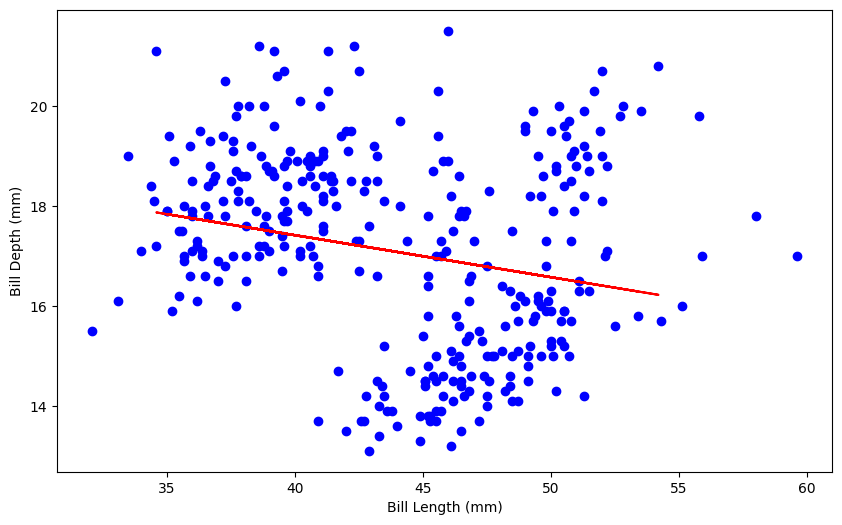

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from palmerpenguins import load_penguins

data = load_penguins().dropna()
X = data[["bill_length_mm"]].values
Y = data["bill_depth_mm"].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_train_pred_linear = model_linear.predict(X_train)
y_test_pred_linear = model_linear.predict(X_test)

mse_train_linear = mean_squared_error(y_train, y_train_pred_linear)
mse_test_linear = mean_squared_error(y_test, y_test_pred_linear)
print("Training MSE:", mse_train_linear)
print("Testing MSE:", mse_test_linear)

plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color="blue")
plt.plot(X_test, y_test_pred_linear, color="red")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.show()


Training MSE: 3.472896571991021
Testing MSE: 3.4011185530075814


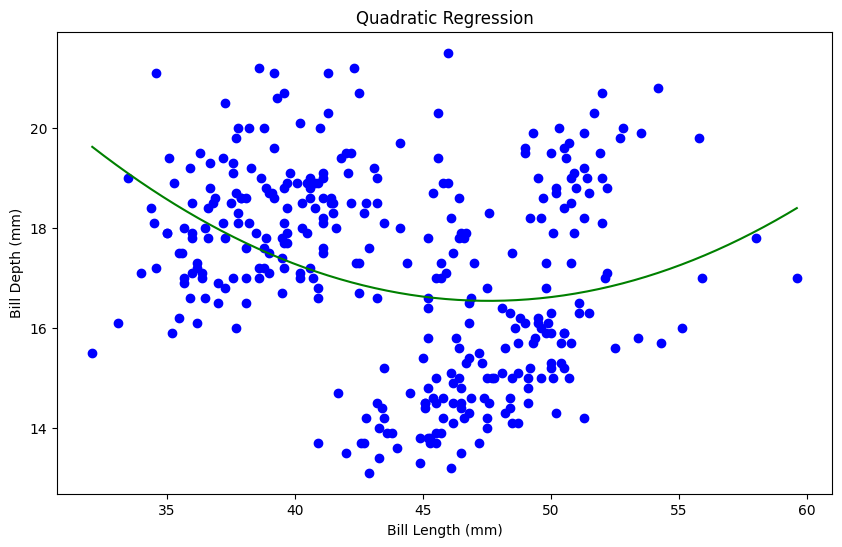

In [76]:

data = load_penguins().dropna()
X = data[["bill_length_mm"]].values
Y = data["bill_depth_mm"].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

#ChatGPT recommended hstack to concatenate the arrays
X_train_quad = np.hstack([X_train, X_train ** 2])
X_test_quad = np.hstack([X_test, X_test ** 2])

model_quad = LinearRegression()
model_quad.fit(X_train_quad, y_train)
y_train_pred_quad = model_quad.predict(X_train_quad)
y_test_pred_quad = model_quad.predict(X_test_quad)

mse_train_quad = mean_squared_error(y_train, y_train_pred_quad)
mse_test_quad = mean_squared_error(y_test, y_test_pred_quad)
print("Training MSE:", mse_train_quad)
print("Testing MSE:", mse_test_quad)

# Used ChatGPT to help create a smooth predictor line
X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
X_range_quad = np.hstack([X_range, X_range ** 2])
y_range_pred = model_quad.predict(X_range_quad)

plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color="blue")
plt.plot(X_range, y_range_pred, color="green")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.title("Quadratic Regression")
plt.show()



Training MSE: 3.1623255112066087
Testing MSE: 3.950293729601405


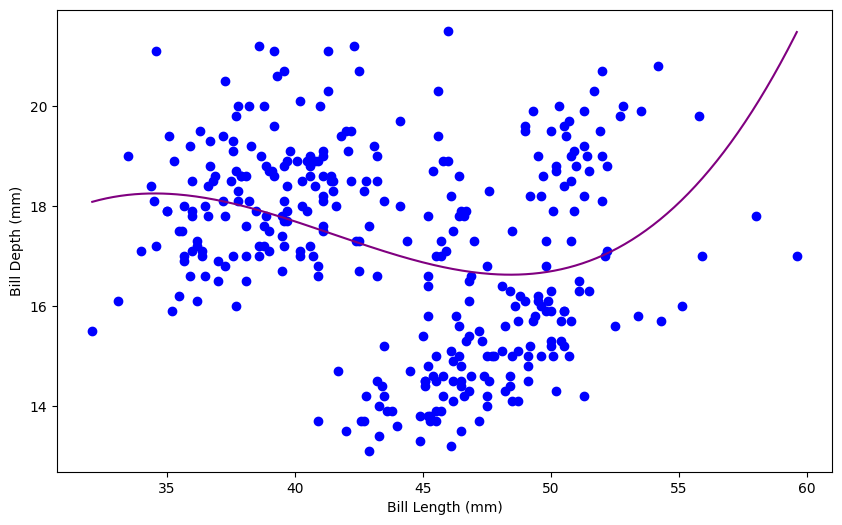

In [65]:
data = load_penguins().dropna()
X = data[["bill_length_mm"]].values
Y = data["bill_depth_mm"].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

#I was having issues with creating the cubic model - ChatGPT suggessted including the prior values as well (xtrain ** 2)
X_train_cubic = np.hstack([X_train, X_train ** 2, X_train ** 3])
X_test_cubic = np.hstack([X_test, X_test ** 2, X_test ** 3])

model_cubic = LinearRegression()
model_cubic.fit(X_train_cubic, y_train)
y_train_pred_cubic = model_cubic.predict(X_train_cubic)
y_test_pred_cubic = model_cubic.predict(X_test_cubic)

mse_train_cubic = mean_squared_error(y_train, y_train_pred_cubic)
mse_test_cubic = mean_squared_error(y_test, y_test_pred_cubic)
print("Training MSE:", mse_train_cubic)
print("Testing MSE:", mse_test_cubic)

X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
X_range_cubic = np.hstack([X_range, X_range ** 2, X_range ** 3])
y_range_pred = model_cubic.predict(X_range_cubic)

plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color="blue")
plt.plot(X_range, y_range_pred, color="purple")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.show()


Training MSE: 2.809026984780167
Testing MSE: 2.695552143924188


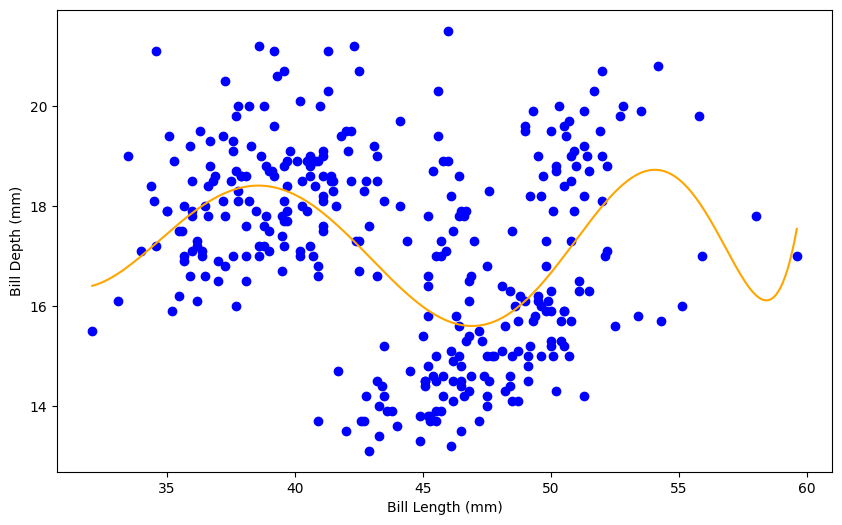

In [75]:
data = load_penguins().dropna()
X = data[["bill_length_mm"]].values
Y = data["bill_depth_mm"].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# ChatGPT suggested this to create the 10th degree polynomial effect. Similar to above but used logic to include all degrees
X_train_poly10 = np.hstack([X_train ** i for i in range(1, 11)])
X_test_poly10 = np.hstack([X_test ** i for i in range(1, 11)])

model_poly10 = LinearRegression()
model_poly10.fit(X_train_poly10, y_train)
y_train_pred_poly10 = model_poly10.predict(X_train_poly10)
y_test_pred_poly10 = model_poly10.predict(X_test_poly10)

mse_train_poly10 = mean_squared_error(y_train, y_train_pred_poly10)
mse_test_poly10 = mean_squared_error(y_test, y_test_pred_poly10)
print("Training MSE:", mse_train_poly10)
print("Testing MSE:", mse_test_poly10)

# Same as above used ChatGPT for reccomendation on line fitting
X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
X_range_poly10 = np.hstack([X_range ** i for i in range(1, 11)])
y_range_pred = model_poly10.predict(X_range_poly10)

plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color="blue")
plt.plot(X_range, y_range_pred, color="orange")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.show()


* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

The linear model has similar values of MSE for test and training data so that is either underfitting or is a good predictor. The quadratic is similar in values as well so the same goes for that model. The cubic is overfitting to due having better MSE in the training. Lastly the 10 polynomial is also similar which is interesting because I would have thought it is overfitting. The quadratic model seems to be consistent and have the best predictions.